In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
main = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
main.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
print(main.dtypes)
print('-' * 50)
print(main.isnull().sum())

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
--------------------------------------------------
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:>

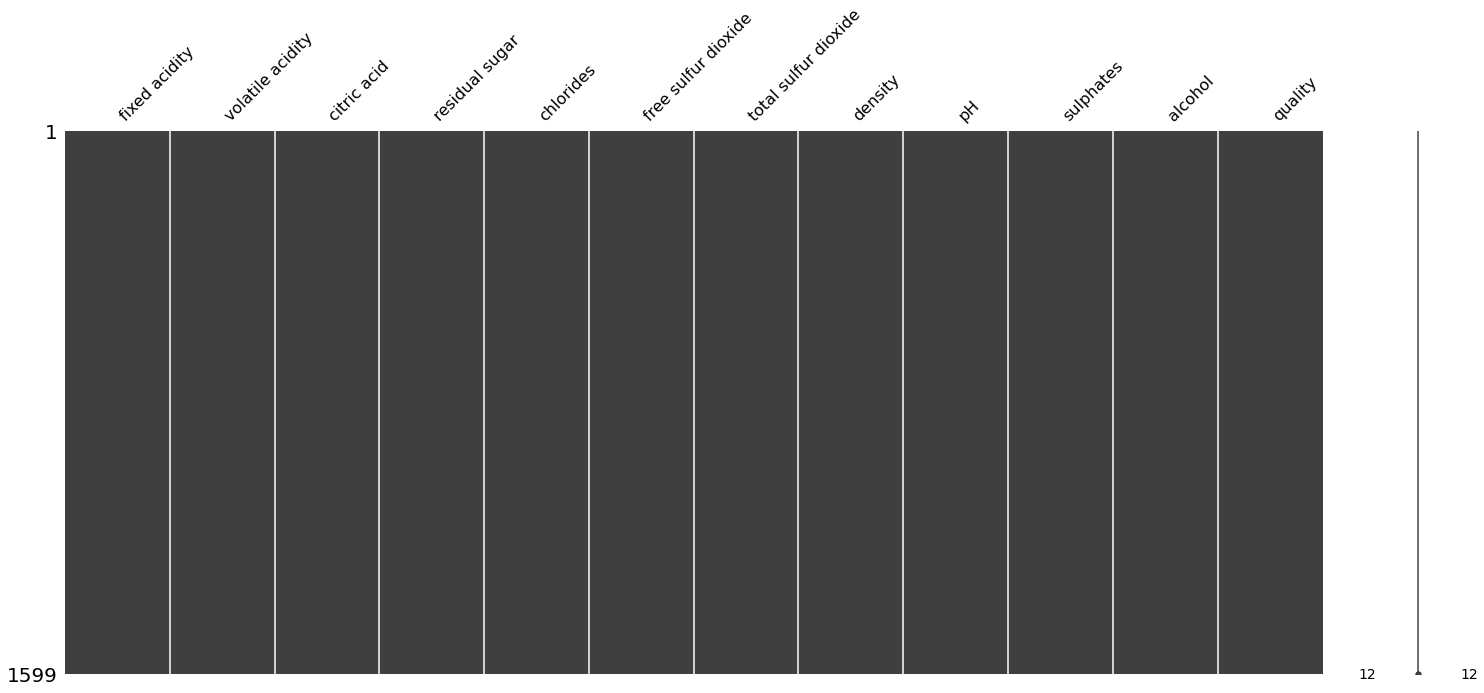

In [4]:
import missingno as msn
msn.matrix(main)

<AxesSubplot:xlabel='quality', ylabel='count'>

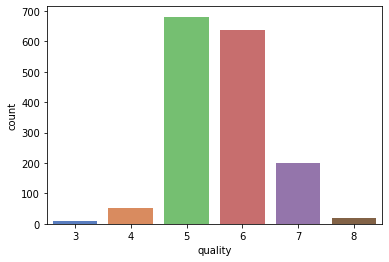

In [5]:
sns.countplot(x = main['quality'], palette= 'muted')

In [6]:
#correlating vaiables with quality
main.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:>

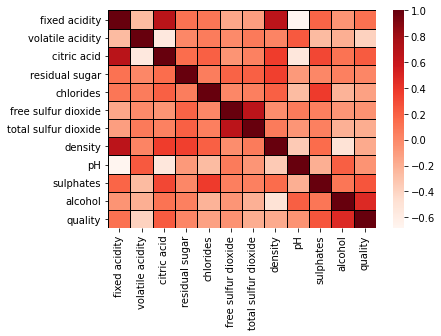

In [7]:
sns.heatmap(main.corr(), cmap = 'Reds', linewidth = 1, linecolor = 'Black')

In [8]:
main['quality']=[1 if i > 6.5 else 0 for i in main['quality']]
main['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

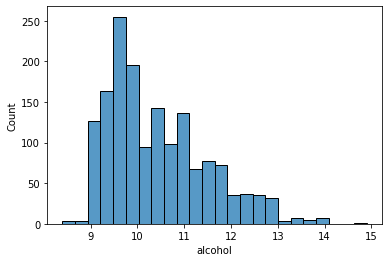

In [9]:
sns.histplot(main['alcohol'], palette = 'muted')

# Box Plots for the important variables

<AxesSubplot:xlabel='fixed acidity'>

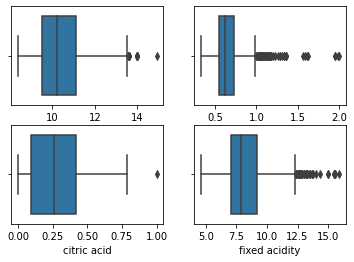

In [10]:
plt.subplot(2,2,1)
sns.boxplot(x = main['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(x = main['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x = main['citric acid'])
plt.subplot(2,2,4)
sns.boxplot(x = main['fixed acidity'])

<AxesSubplot:xlabel='chlorides'>

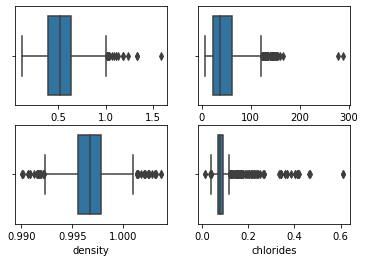

In [11]:
plt.subplot(2,2,1)
sns.boxplot(x = main['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(x = main['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x = main['density'])
plt.subplot(2,2,4)
sns.boxplot(x = main['chlorides'])

In [12]:
main['zscore'] = ((main['citric acid'] - main['citric acid'].mean())/main['citric acid'].std())
fltr = np.abs(main['zscore'])<3 
main = main[fltr]
main.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,-1.391037
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,-1.391037
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,-1.185699
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1.483689
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,-1.391037


In [13]:
main['zscore2'] = ((main['alcohol'] - main['alcohol'].mean())/main['alcohol'].std())
fltr = np.abs(main['zscore2'])<3
main = main[fltr]

main['zscore3'] = ((main['total sulfur dioxide'] - main['total sulfur dioxide'].mean())/main['total sulfur dioxide'].std())
fltr = np.abs(main['zscore2'])<3
main = main[fltr]

In [14]:
x = main.drop(['quality', 'zscore', 'zscore2', 'zscore3', 'free sulfur dioxide'], axis = 1)
y = main['quality']


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 41)

# Applying Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8962264150943396

# Decision Tree Classifier

In [19]:
md = tree.DecisionTreeClassifier()
md.fit(x_train, y_train)
md.score(x_test, y_test)


0.8113207547169812

# Support Vector Machine

In [20]:
md = SVC()
md.fit(x_train, y_train)
md.score(x_test, y_test)

0.9182389937106918

# KNeighborsClassifier

In [21]:
for i in range(1,20):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(str(i)+') '+str(model.score(x_test,y_test)))

1) 0.8805031446540881
2) 0.8805031446540881
3) 0.8616352201257862
4) 0.8930817610062893
5) 0.8867924528301887
6) 0.9025157232704403
7) 0.889937106918239
8) 0.889937106918239
9) 0.8930817610062893
10) 0.89937106918239
11) 0.8962264150943396
12) 0.9025157232704403
13) 0.9056603773584906
14) 0.9182389937106918
15) 0.9119496855345912
16) 0.9150943396226415
17) 0.9025157232704403
18) 0.9150943396226415
19) 0.9088050314465409


**n_neighbors = 14 gave the most accurate score**

In [22]:
model=KNeighborsClassifier( n_neighbors=14,metric='manhattan')
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.9182389937106918

**I get the best scores in:**
* 20% test data and when random_state is 41
* The score improves iof I take less data for test but it is better to keep atleast 20% data in test
* The best fitted Algorithms in this case were Support Vector Machine and KNeighborsClassifier.
* Both of the algorithms gave an accuracy score of 91.8%